In [2]:
from __future__ import division
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
np.random.seed(1234)
import pymc3 as pm
import scipy.stats as stats
import import_ipynb 
import Assignment_6_template as t

In [3]:
x = [
   -1.64934805,  0.52925273,  1.10100092,  0.38566793, -1.56768245,
    1.26195686,  0.92613986, -0.23942803,  0.33933045,  1.14390657,
    0.65466195, -1.36229805, -0.32393554, -0.23258941,  0.17688024,
    1.60774334, -0.22801156,  1.53008133, -1.31431042, -0.27699609
] # inputs
y = [
   -3.67385666,  3.37543275,  6.25390538,  1.41569973, -2.08413872,
    6.71560158,  6.32344159,  2.40651236,  4.54217349,  6.25778739,
    4.98933806, -2.69713137,  1.45705571, -0.49772953,  1.50502898,
    7.27228263,  1.6267433 ,  6.43580518, -0.50291509,  0.65674682
] # outputs

Calculating actual gradient and intercept values

In [5]:
m, b = np.polyfit(x, y, 1)
print(m)
print(b)

3.203573804887375
2.1945256267835385


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
E:\ProgramData\Anaconda3\envs\pymc3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
E:\ProgramData\Anaconda3\envs\pymc3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
E:\ProgramData\Anaconda3\envs\pymc3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [error, intercept, slope]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 85 seconds.


            mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
slope      3.198  0.246   2.753    3.668      0.005    0.004    2214.0   
intercept  2.204  0.254   1.707    2.641      0.006    0.004    1818.0   
error      1.073  0.189   0.743    1.410      0.005    0.003    1653.0   

           ess_tail  r_hat  
slope        1275.0    1.0  
intercept    1301.0    1.0  
error        1328.0    1.0  


E:\ProgramData\Anaconda3\envs\pymc3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
E:\ProgramData\Anaconda3\envs\pymc3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
E:\ProgramData\Anaconda3\envs\pymc3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)



{'slope': array(3.2030415), 'intercept': array(2.19419872), 'error_log__': array(-0.04403763), 'error': array(0.95691794)}


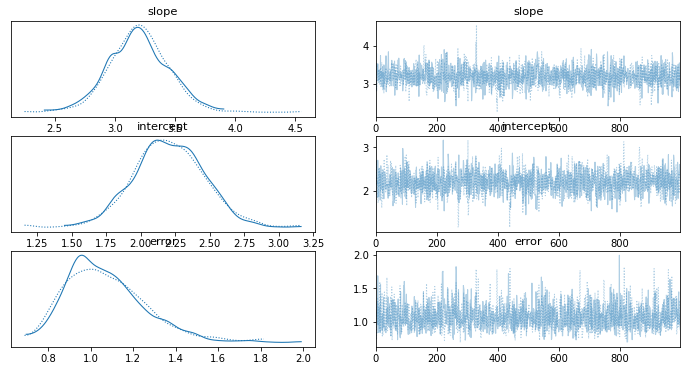

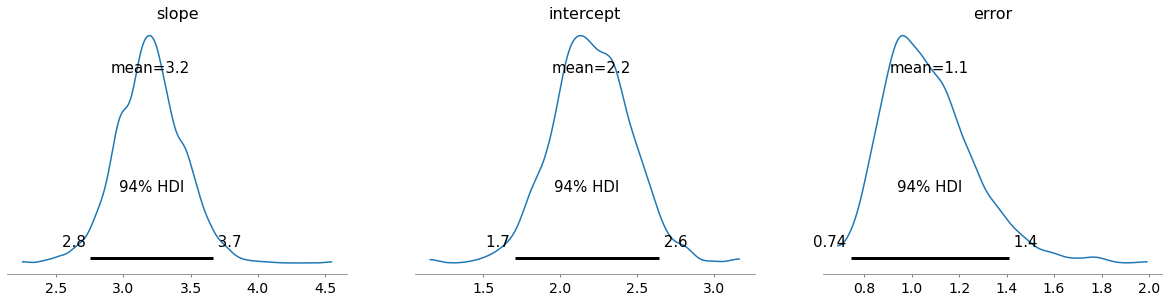

In [4]:
model,trace=t.regmodel(x,y)

The obtained values of gradient(3.2) and y-intercept(2.2) are very close to the actual values calculated above.

Performing prior predictive checks and posterior predictive checks

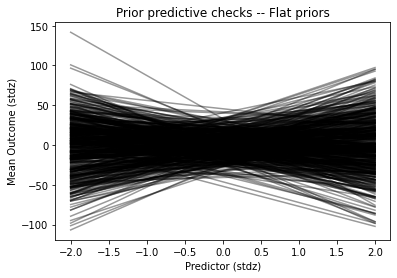

In [6]:
prior=t.priorpc(model)

Priors show a lot of variation.

E:\ProgramData\Anaconda3\envs\pymc3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


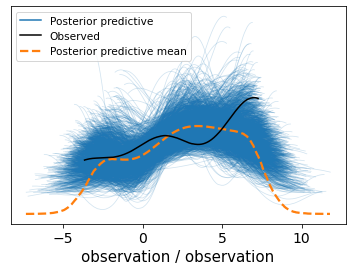

In [7]:
ppc=t.ppc(prior,model,trace,"slope", "intercept", "error",'observation')